## Import Libraries

In [2]:
# importing libraries
import cv2
import os 
import re
import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.feature import graycomatrix, graycoprops

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Loaded data
image_list=[]
output=[]
labels=[]
benign = 0
malignant = 0
normal = 0
#define classes
classes = {'normal':0, 'benign':1, "malignant":2} 

for name in (classes):
    address = './Dataset_BUSI_with_GT/' + name
    for image_name in tqdm.tqdm(os.listdir(address)):
            if re.search('mask', image_name):
                continue
            image = cv2.imread(address + '/' + image_name)
            image = cv2.resize(image, (128,128))
            image = cv2.normalize(image, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype =cv2.CV_8U)
            image_list.append(image)
            output.append(classes[name])
            if classes[name] == 0:
                normal = normal + 1
            elif classes[name] == 1:
                benign = benign + 1
            else:
                malignant = malignant + 1
            labels.append(name)

100%|██████████| 421/421 [00:01<00:00, 274.75it/s]


In [7]:
# number of images
print("No tumor Images :", normal)
print("Benign Images :", benign)
print("Malignant Images :", malignant)
print("Length of data =", len(image_list), "\nFiles =", len(output), "\nLabels =",len(labels))

No tumor Images : 133
Benign Images : 437
Malignant Images : 210
Length of data = 780 
Files = 780 
Labels = 780


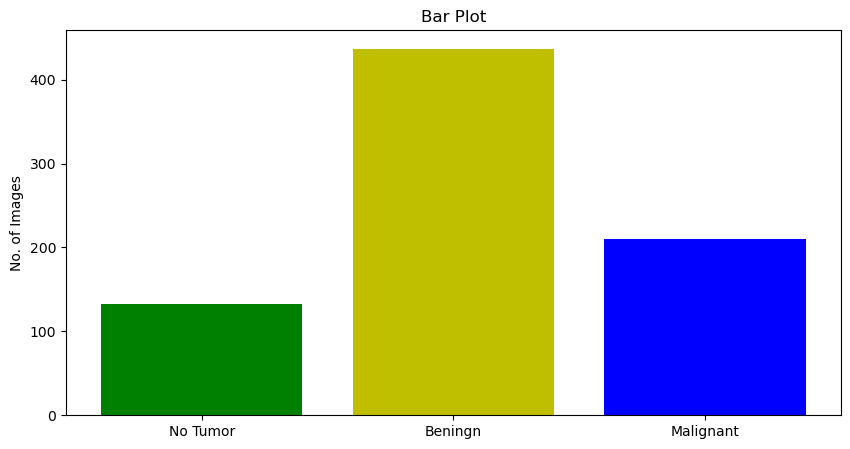

In [8]:
# plot the bar graph for number of benign and malignant images
fig = plt.figure(figsize = (10, 5))

plt.bar([0,1,2],[normal, benign, malignant], color = ['g', 'y', 'b'])
plt.xticks([0,1,2], ['No Tumor', 'Beningn', 'Malignant'])
plt.ylabel("No. of Images")
plt.title("Bar Plot") 
plt.show()

In [9]:
## function to plot sample images
def sample_images(images, sample):
    figure, axes = plt.subplots(1, 6)
    figure.set_size_inches(35,25)
    axes[0].imshow(images[sample[0]], cmap='gray') 
    axes[0].title.set_text("No Tumor")
    axes[0].axis('off')
    axes[1].imshow(images[sample[1]], cmap='gray') 
    axes[1].title.set_text("No Tumor")
    axes[1].axis('off')
    axes[2].imshow(images[sample[2]], cmap='gray') 
    axes[2].axis('off')
    axes[2].title.set_text("Benign")
    axes[3].imshow(images[sample[3]], cmap='gray') 
    axes[3].axis('off')
    axes[3].title.set_text("Benign")
    axes[4].imshow(images[sample[4]], cmap='gray') 
    axes[4].axis('off')
    axes[4].title.set_text("Malignant")
    axes[5].imshow(images[sample[5]], cmap='gray') 
    axes[5].axis('off')
    axes[5].title.set_text("Malignant")
    plt.show()

In [10]:
# function to find the histogram of images
def draw_hist(img):
    if len(img.shape) > 2:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hist = np.zeros((256,1))
    for x in np.nditer(img):
        if x > 255:
            x = 255
        elif x < 0:
            x = 0
        hist[int(x)] = hist[int(x)] + 1
    return hist

## function to plot sample histogram of images
def plot_hist(images, sample, figsize=[30,3]):
    fig = plt.figure(figsize=figsize)
    plt.subplot(1,6,1)
    plt.plot(draw_hist(images[sample[0]]))
    plt.title('histogram for no tumor')
    plt.subplot(1,6,2)
    plt.plot(draw_hist(images[sample[1]]))
    plt.title('histogram for no tumor')
    plt.subplot(1,6,3)
    plt.plot(draw_hist(images[sample[2]]))
    plt.title('histogram for benign')
    plt.subplot(1,6,4)
    plt.plot(draw_hist(images[sample[3]]))
    plt.title('histogram for benign')
    plt.subplot(1,6,5)
    plt.plot(draw_hist(images[sample[4]]))
    plt.title('histogram for malignant')
    plt.subplot(1,6,6)
    plt.plot(draw_hist(images[sample[5]]))
    plt.title('histogram for malignant')
    plt.show()

In [11]:
## look for image shape and type of input images
input_images = image_list
print(np.array(input_images).shape)
print(input_images[10].dtype)

(780, 128, 128, 3)
uint8


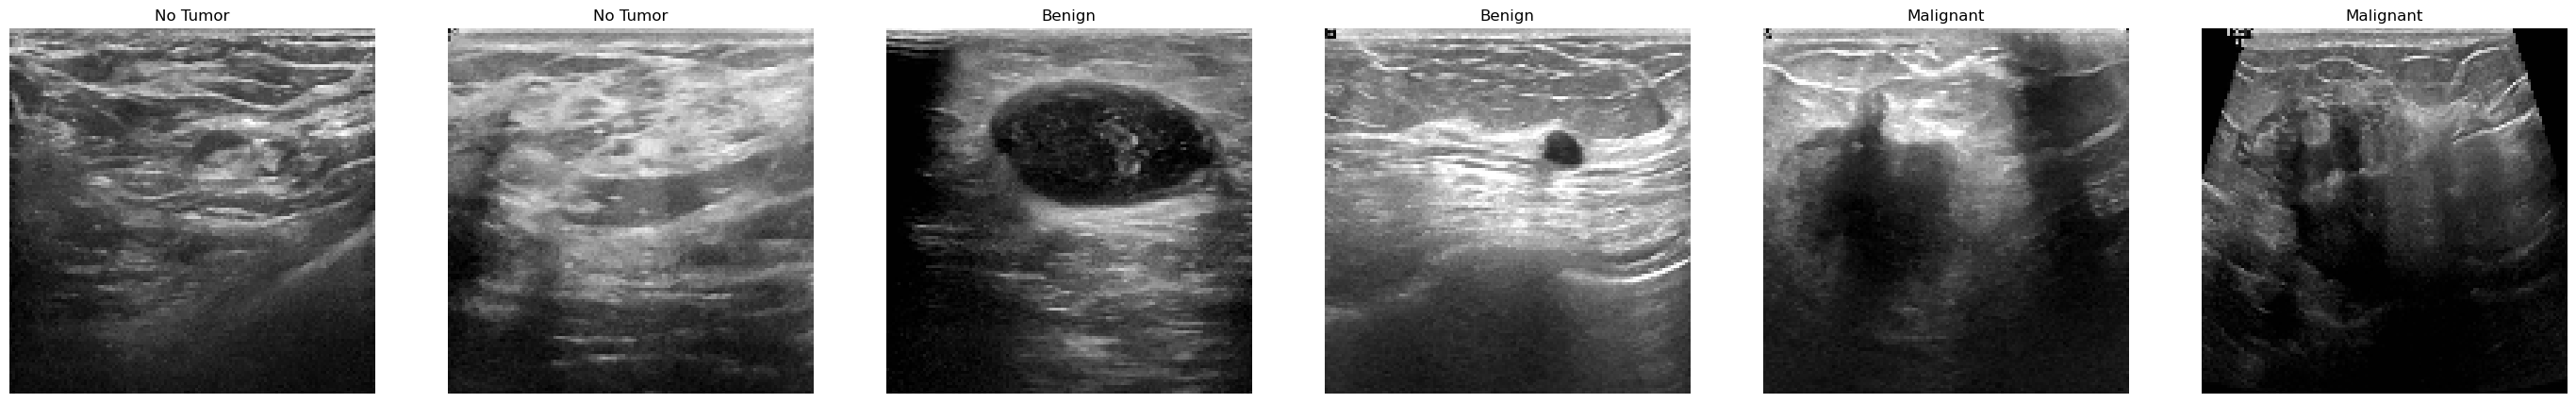

In [12]:
## plot the sample images
sample = [0, 22, 160, 400, 600, 650]
sample_images(input_images, sample)

## Image Preprocessing

### Grayscale Image

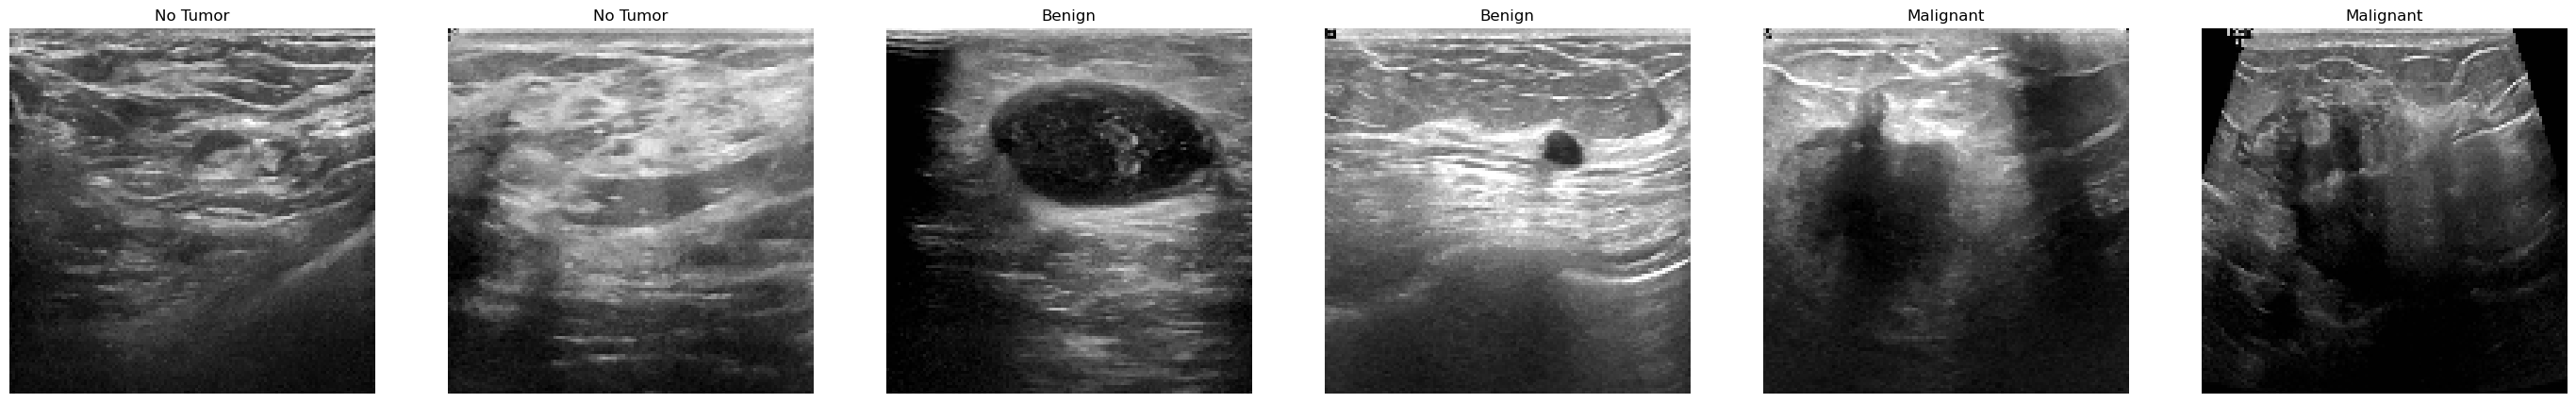

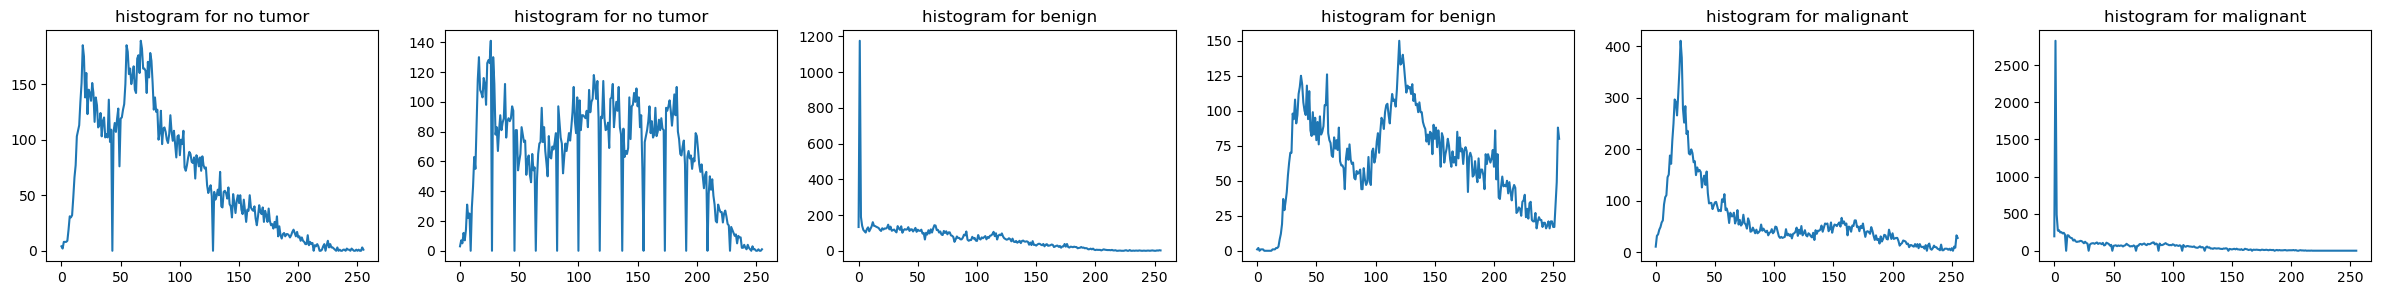

In [13]:
# convert the RBG images to gray scale images
grayscale_images = []
grayscale_images.clear()
for idx, image in enumerate(input_images, 1):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    grayscale_images.append(gray_image)
sample_images(grayscale_images, sample)
plot_hist(grayscale_images, sample)

### Histogram Equalization

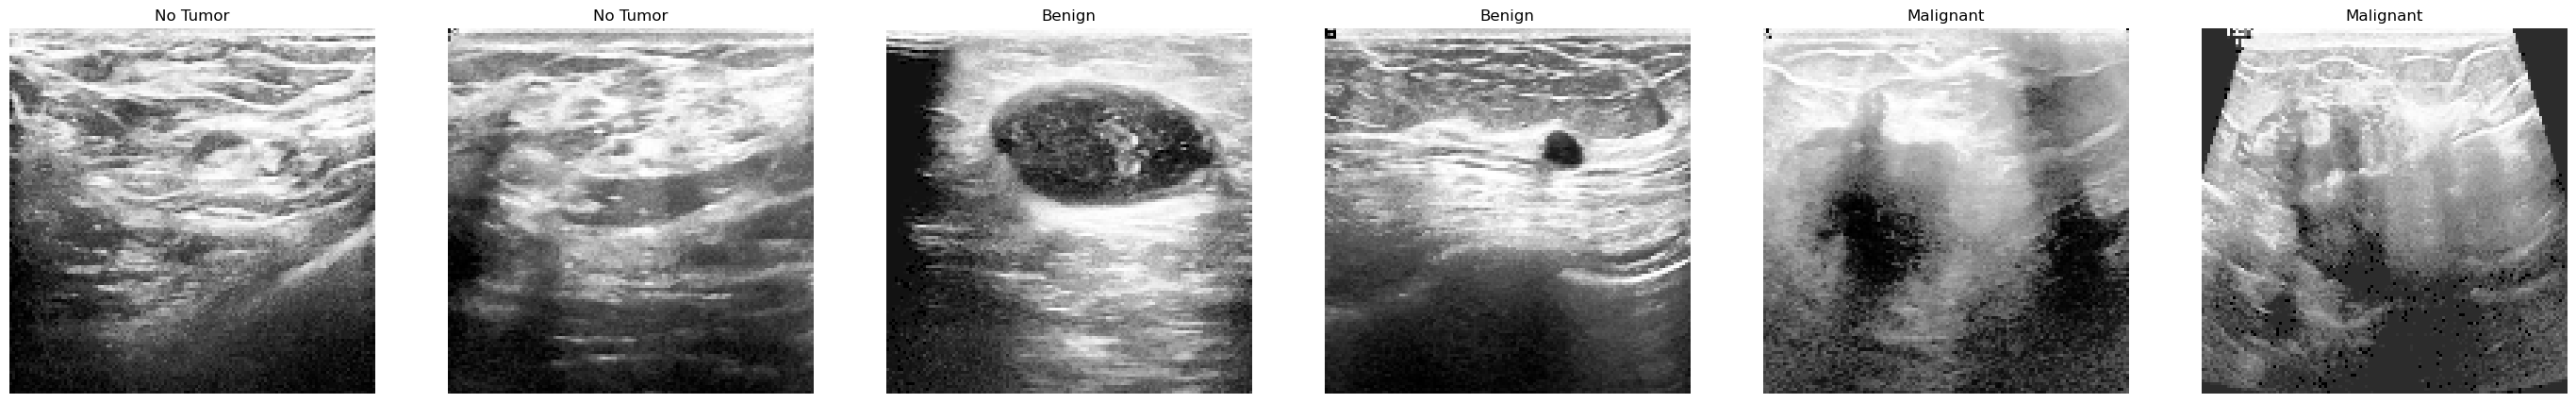

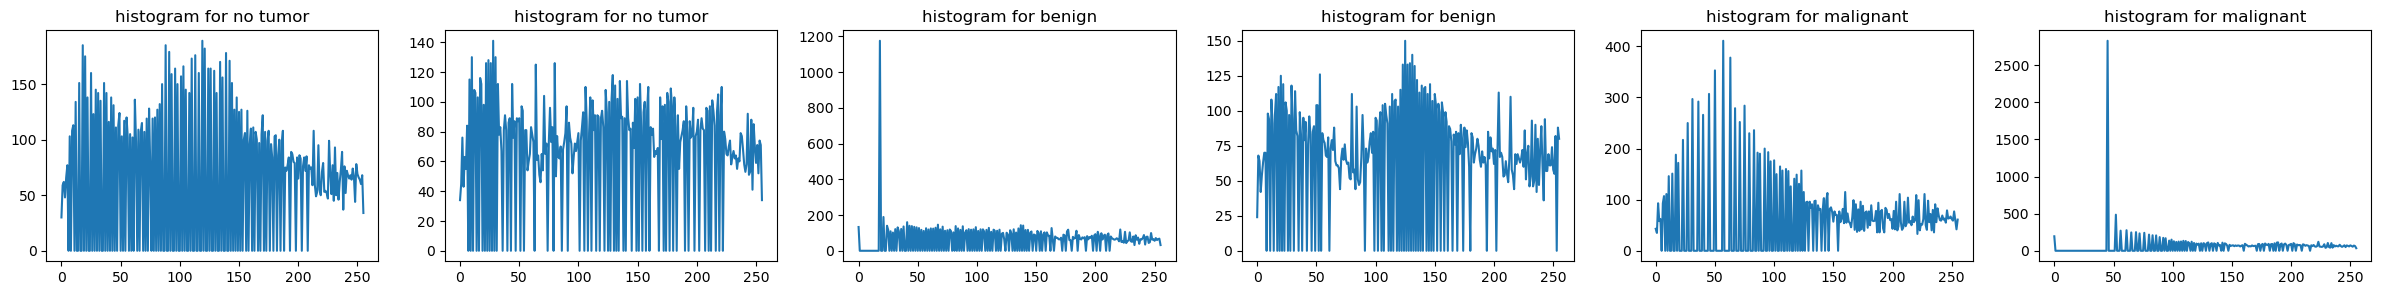

In [14]:
# histogram equalization on gray scale images
eqhist_images=[]
eqhist_images.clear()
for idx, image in enumerate(grayscale_images):
    eqhistimage = cv2.equalizeHist(image)
    eqhist_images.append(eqhistimage)
sample_images(eqhist_images, sample)
plot_hist(eqhist_images, sample)

### Bilateral Filter

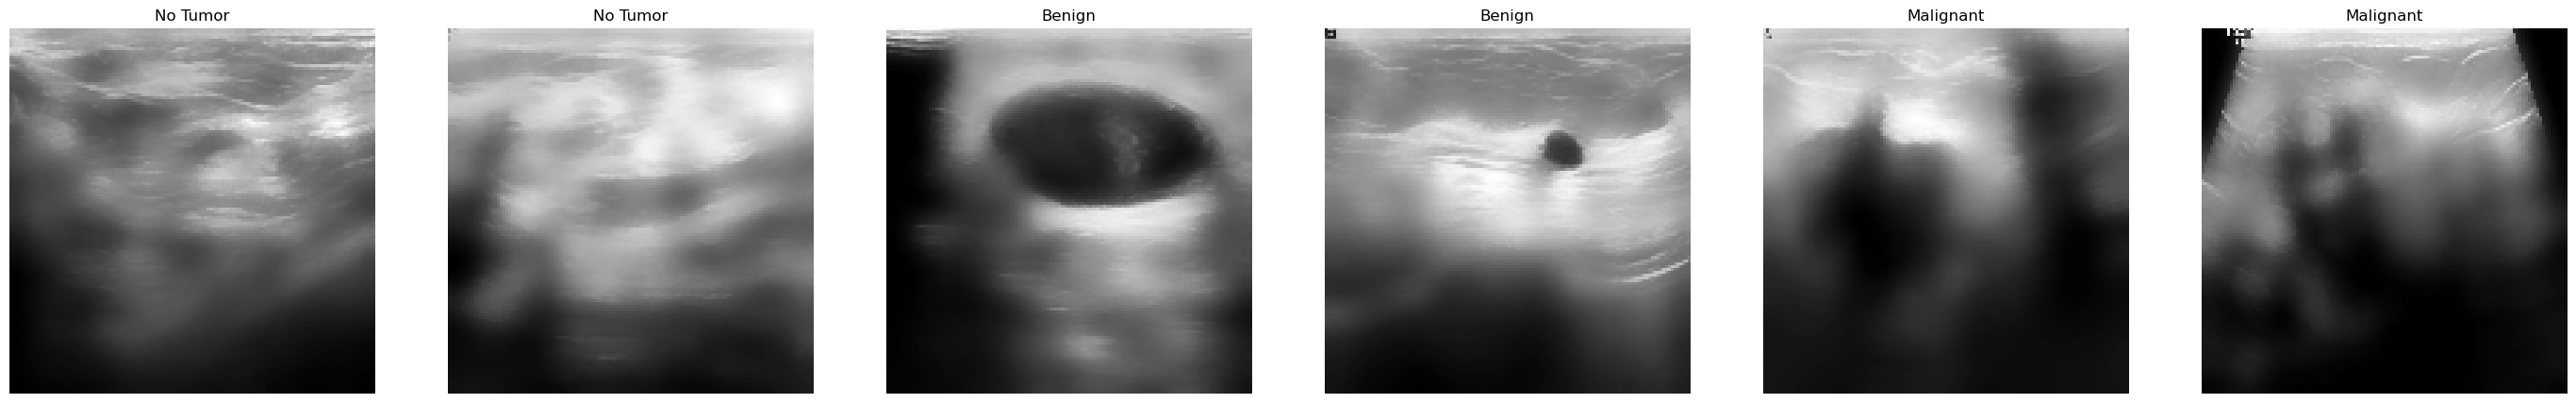

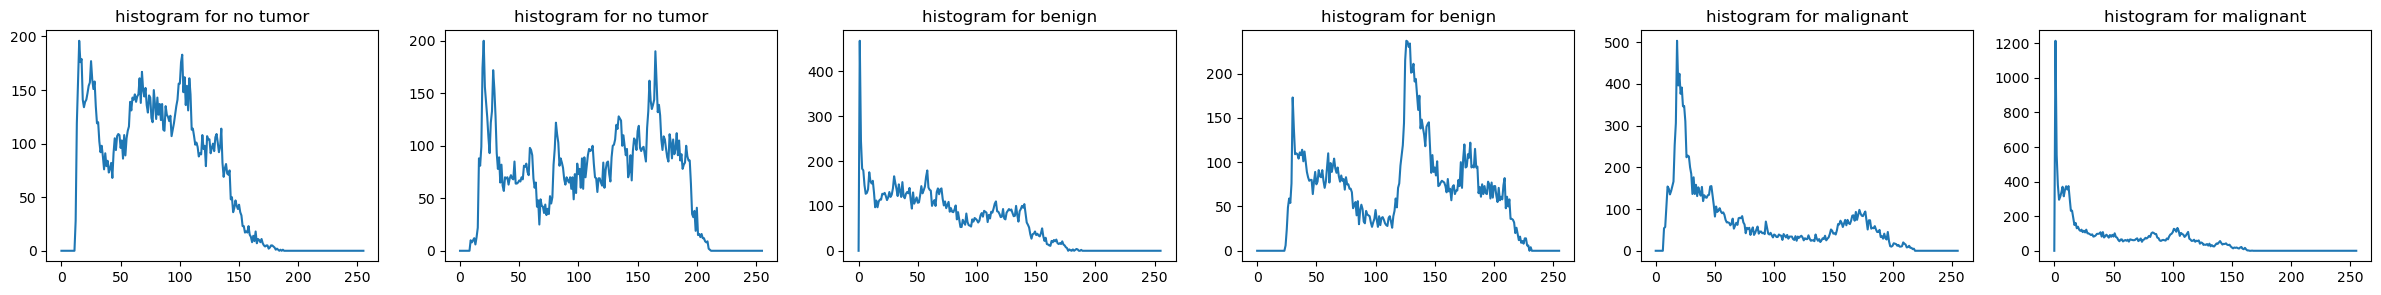

In [15]:
## Applying bilateral filter on grayscale images
bilateral_images = []
bilateral_images.clear()
for idx, image in enumerate(grayscale_images):
    bilateral = cv2.bilateralFilter(image, 15, 75, 75)
    bilateral_images.append(bilateral)
sample_images(bilateral_images, sample)
plot_hist(bilateral_images, sample)

### CLAHE

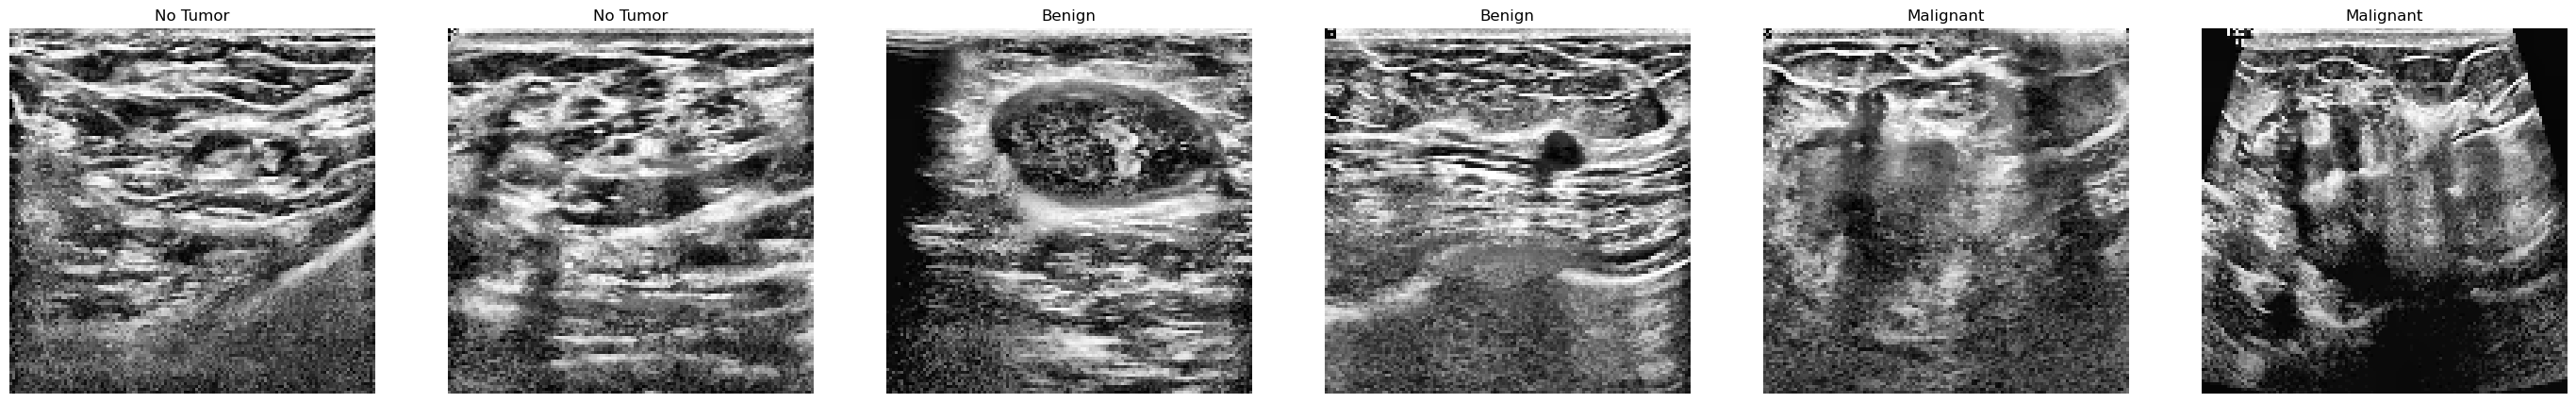

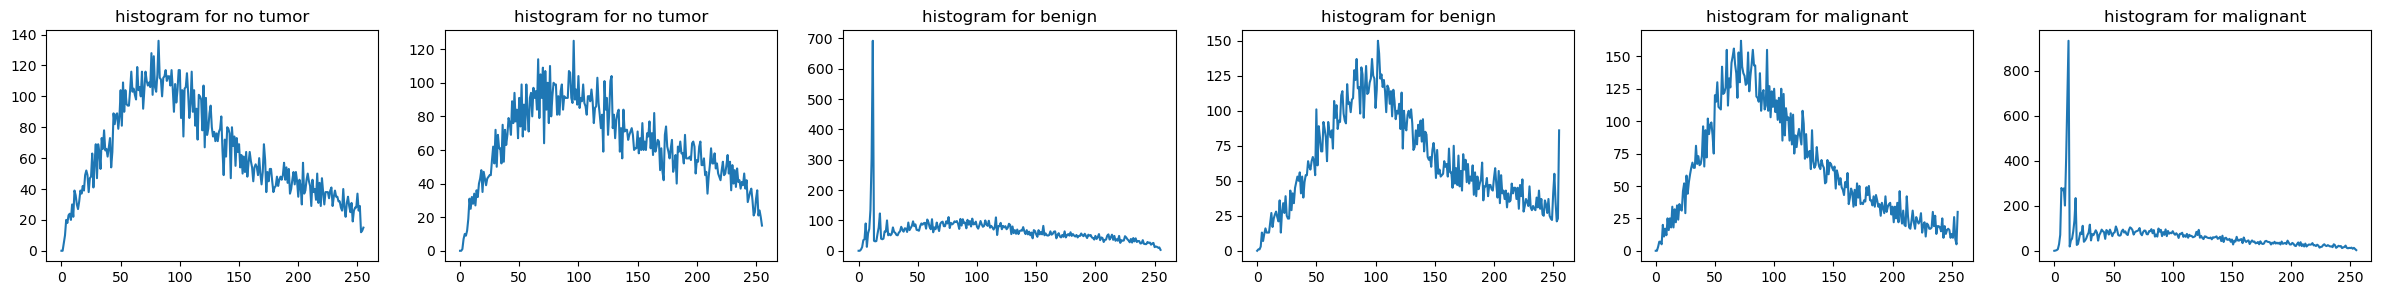

In [16]:
# applying clahe on grayscale images
Clahe_images=[]
Clahe_images.clear()
for idx, image in enumerate(grayscale_images):
    clahe = cv2.createCLAHE(clipLimit = 5)
    clahe_img = clahe.apply(image) 
    Clahe_images.append(clahe_img)

sample_images(Clahe_images, sample)
plot_hist(Clahe_images, sample)

### Otsu Binarization

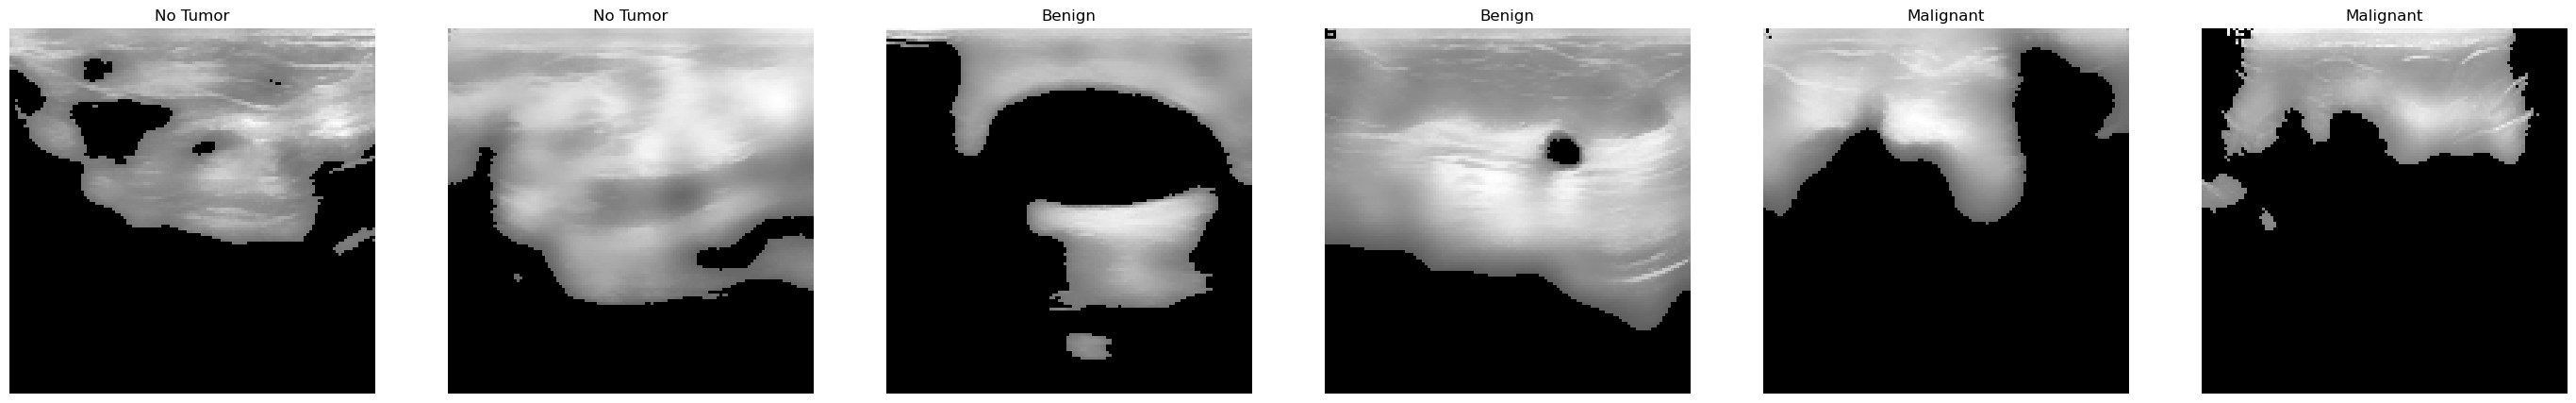

In [17]:
thresholded=[]
thresholded.clear()
for image in bilateral_images:
    thresh, binaryImg = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU)
    ret, image = cv2.threshold(image,thresh-20,255,cv2.THRESH_TOZERO)
    thresholded.append(image)
#(np.array(thresholded)).shape
sample_images(thresholded, sample)

### Adaptive_Threshold

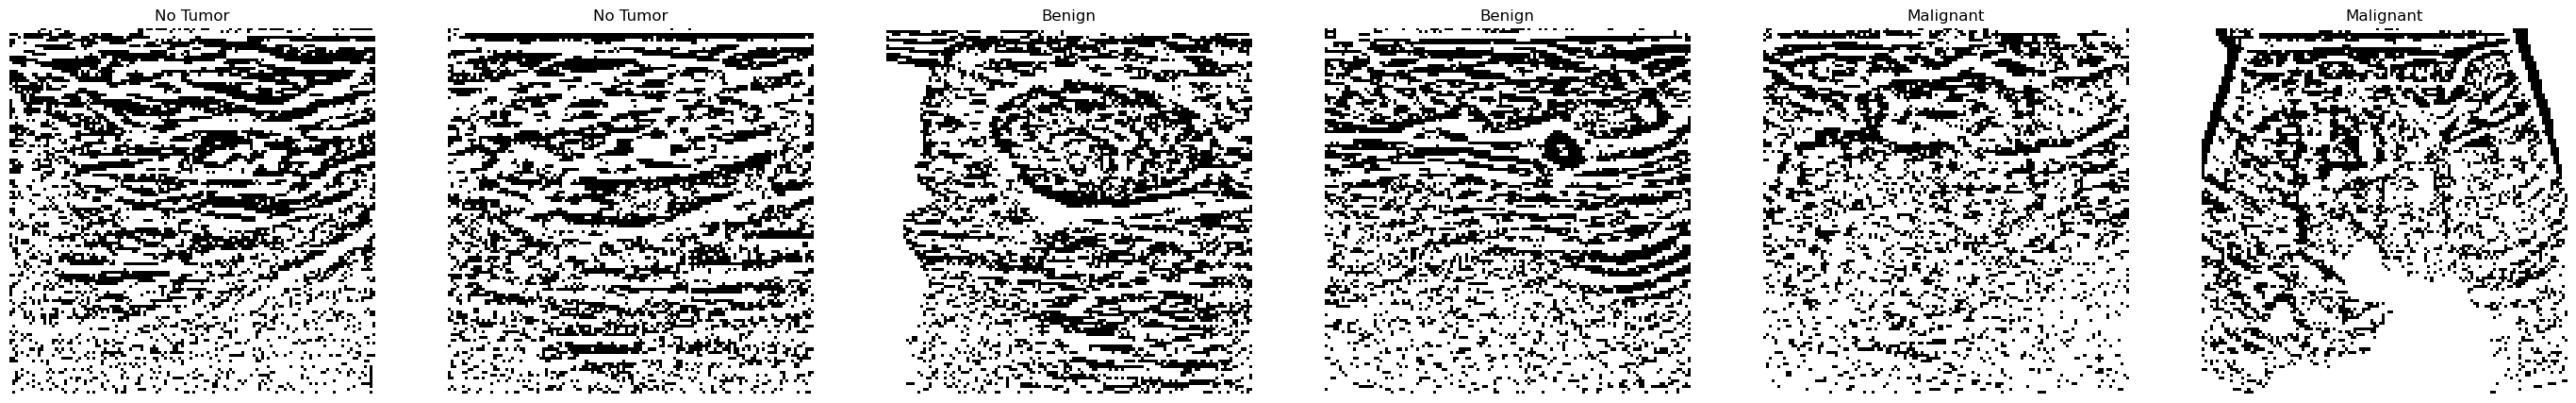

In [18]:
# Applied threshold to zero inversion
thresholded_images=[]
thresholded_images.clear()
for idx, image in enumerate(grayscale_images):
    image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, 5)
    thresholded_images.append(image)
sample_images(thresholded_images, sample)

## Edge Detection

### Sobel Edge Detection

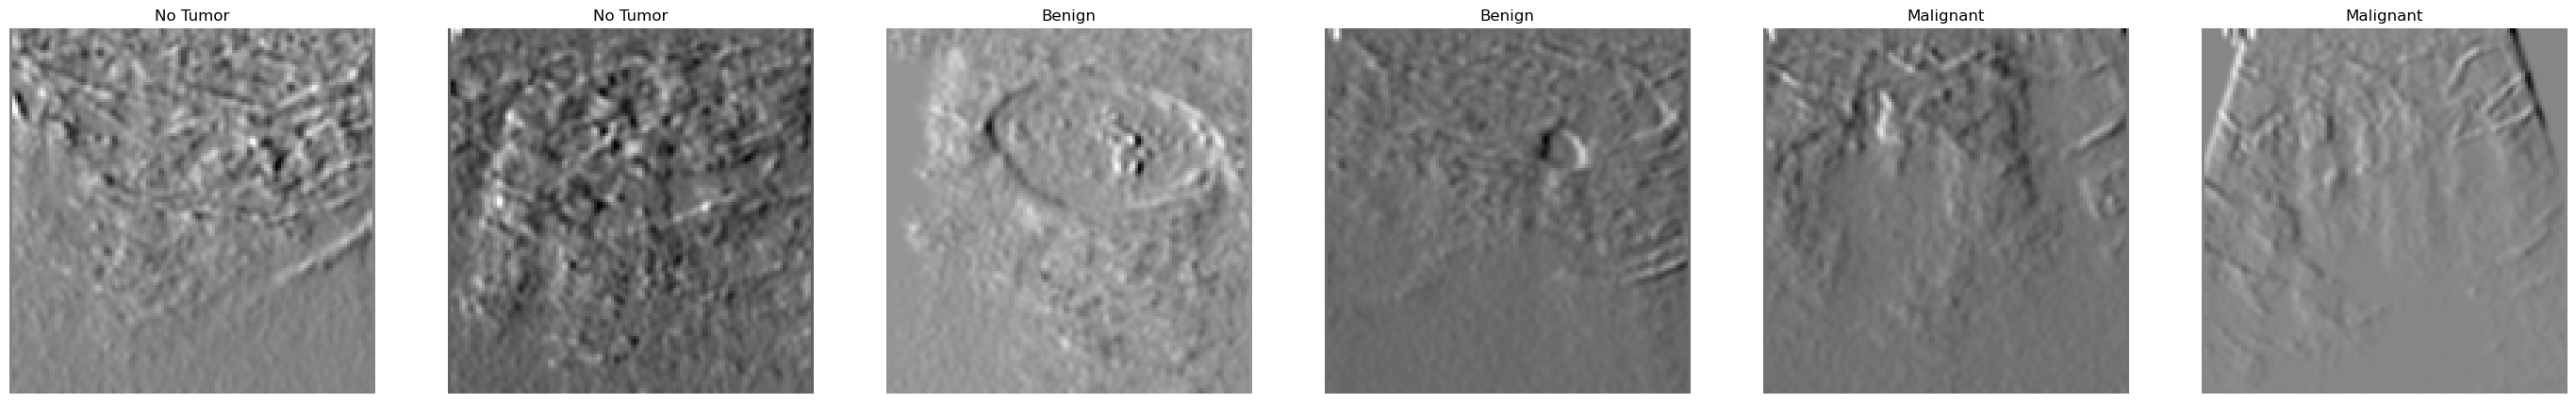

In [19]:
# Using sobel filter on grayscale images
x_edged_images=[]
x_edged_images.clear()
for idx, image in enumerate(grayscale_images):
    sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)
    x_edged_images.append(sobelx)
sample_images(x_edged_images, sample)

### Conny Edge Detection

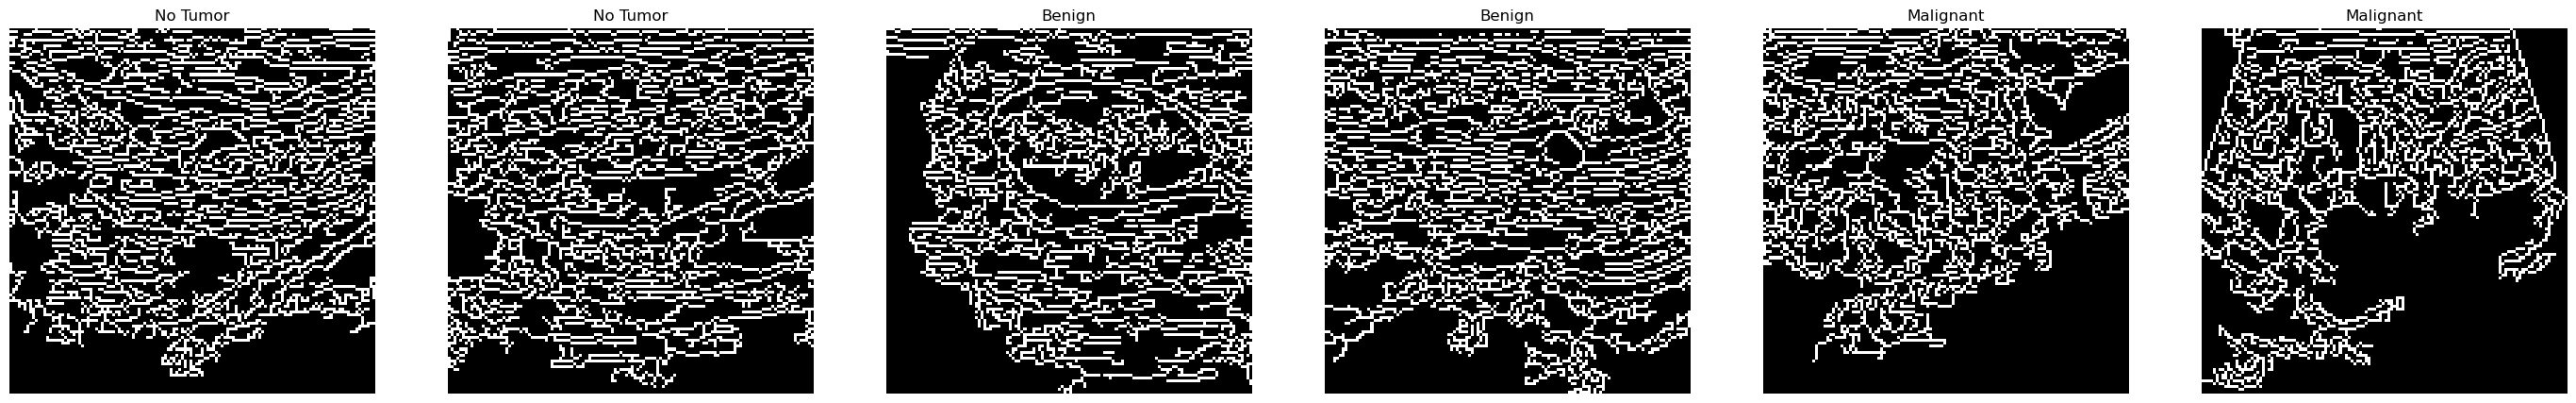

In [20]:
conny_edged_images=[]
conny_edged_images.clear()
for idx, image in enumerate(input_images):
    image = cv2.Canny(image,10,200)
    conny_edged_images.append(image)
sample_images(conny_edged_images, sample)

## Morphological Operations

### Erosion

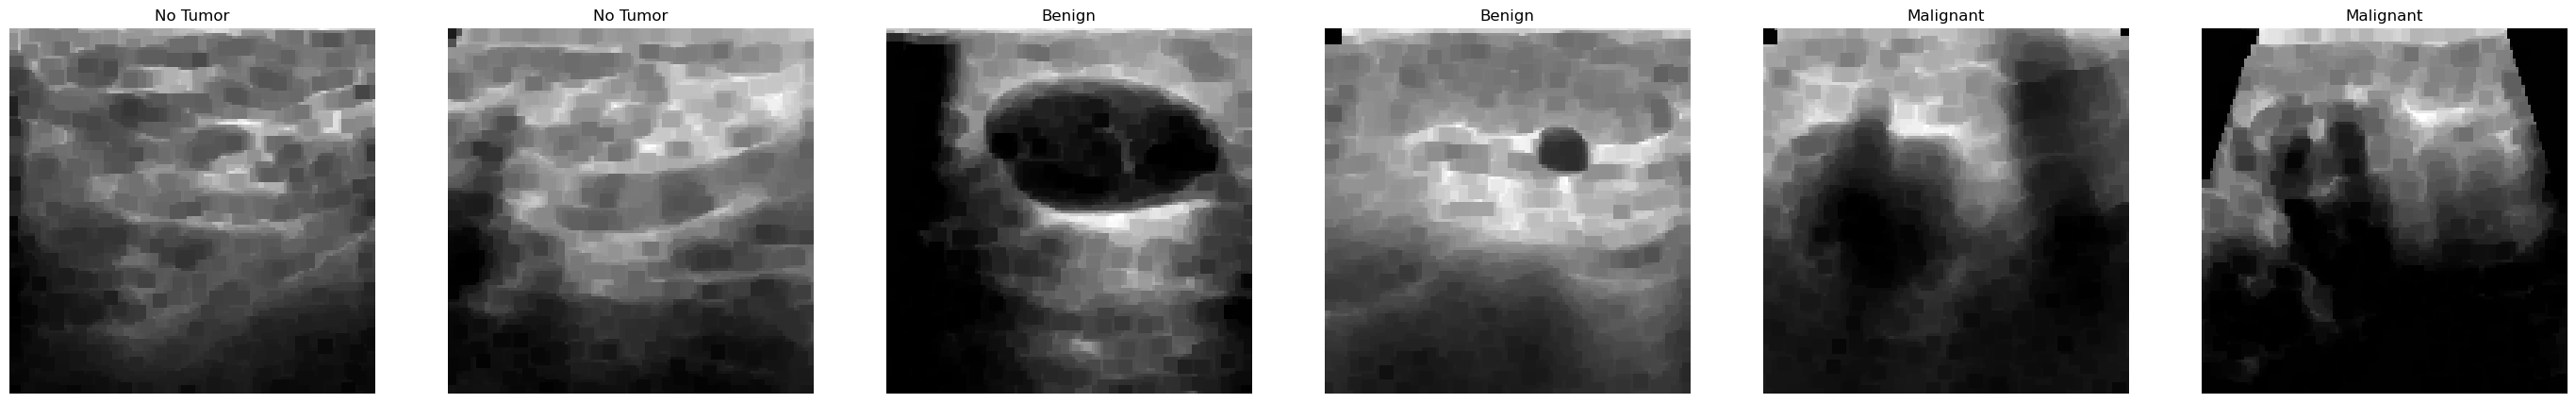

In [21]:
ero_images = []
ero_images.clear()
kernel = np.ones((5,5),np.uint8)
for idx, image in enumerate(grayscale_images):
    
    erosion = cv2.erode(image,kernel,iterations = 1)
    ero_images.append(erosion)
sample_images(ero_images, sample)

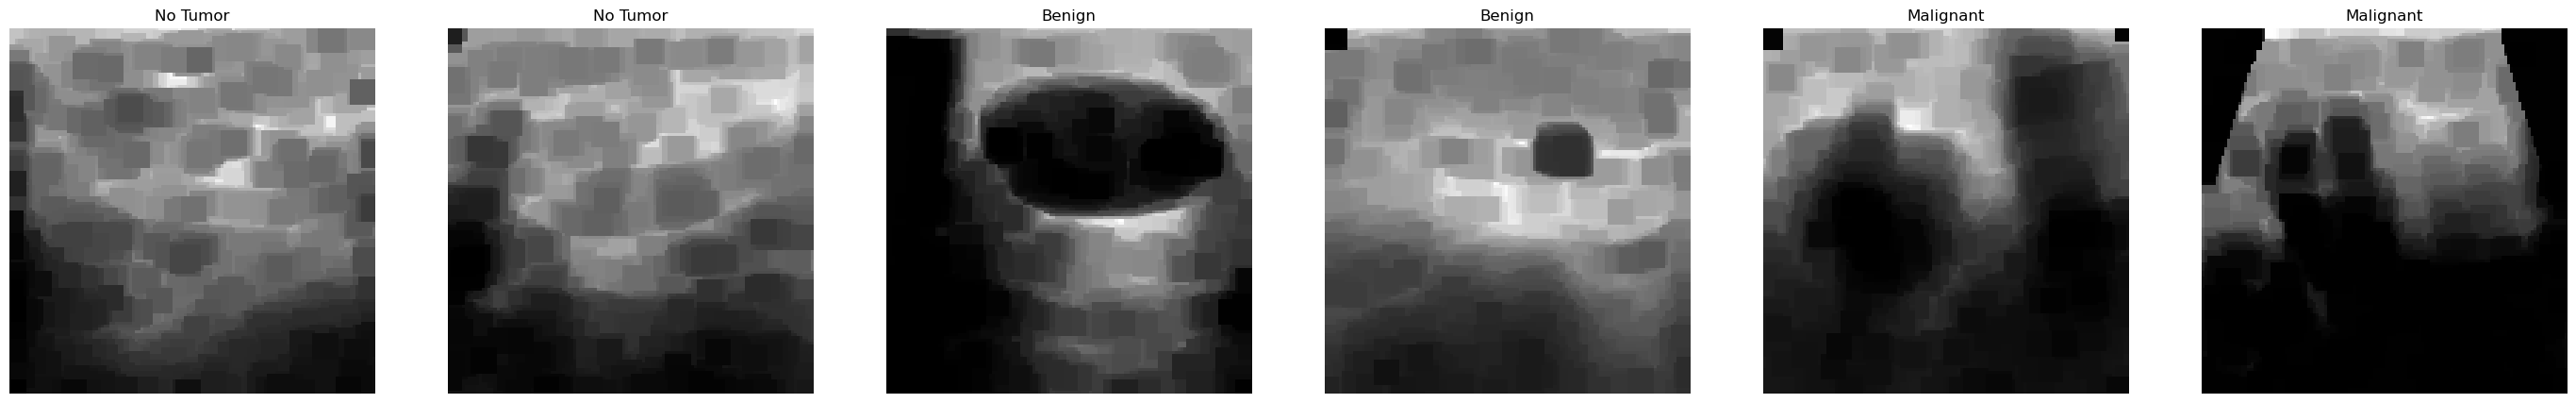

In [22]:
ero_images = []
ero_images.clear()
kernel = np.ones((3,3),np.uint8)
for idx, image in enumerate(grayscale_images):
    
    erosion = cv2.erode(image,kernel,iterations = 2)
    dilation = cv2.dilate(erosion,kernel,iterations = 1)
    erosion = cv2.erode(dilation,kernel,iterations = 2)
    dilation = cv2.dilate(erosion,kernel,iterations = 1)
    erosion = cv2.erode(dilation,kernel,iterations = 2)
    ero_images.append(erosion)
sample_images(ero_images, sample)

## Dilation

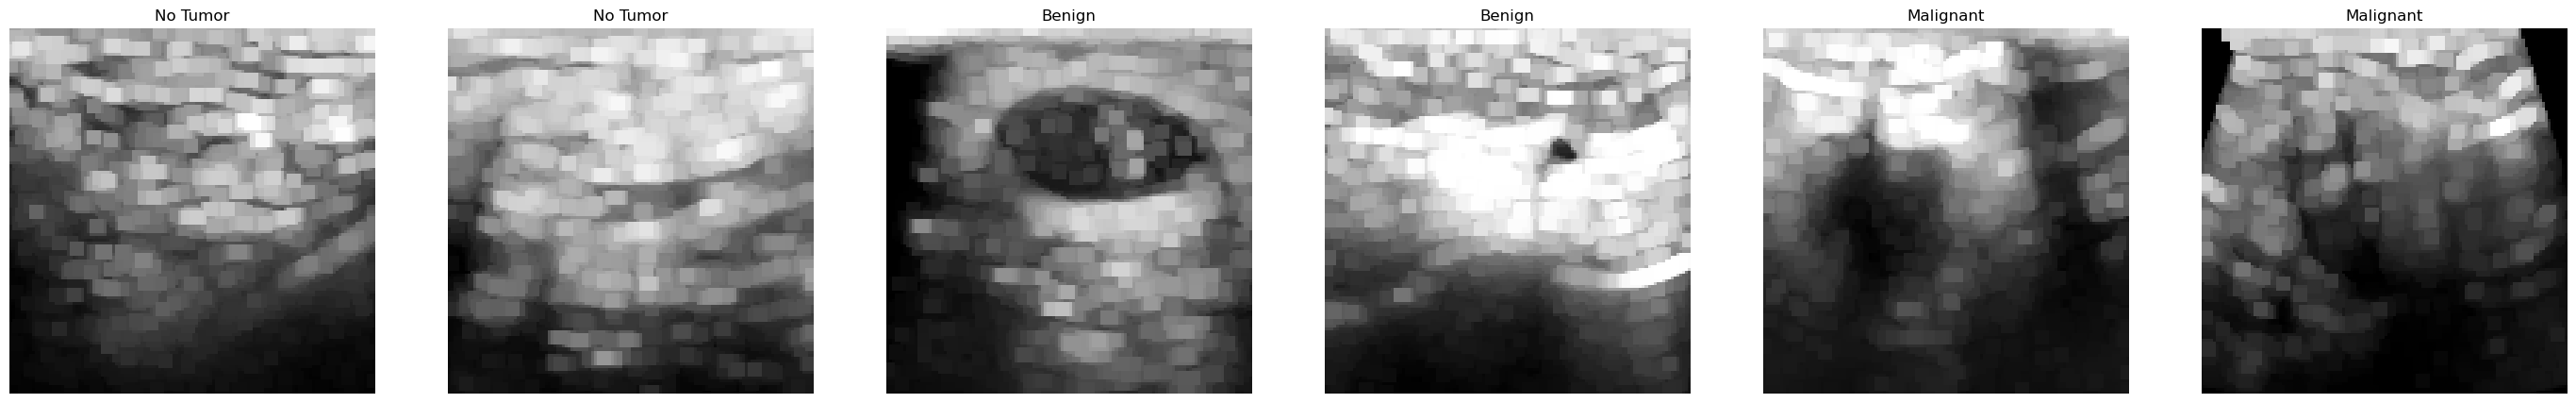

In [23]:
dilation_images = []
dilation_images.clear()
kernel = np.ones((5,5),np.uint8)
for idx, image in enumerate(grayscale_images):
    dilation = cv2.dilate(image,kernel,iterations = 1)
    dilation_images.append(dilation)
sample_images(dilation_images, sample)

## Calculation Statistical and GLCM Features

In [24]:
# calculating the GLCM features
Energy = []
Correlation = []
Dissimilarity = []
Homogenity = []
Contrast = []
Entropy = []


def energy(img):
    img = np.array(img)
    GLCM = graycomatrix(img, [1], [0])
    return graycoprops(GLCM, 'energy')[0]

def correlation(img):
    img = np.array(img)
    GLCM = graycomatrix(img, [1], [0])
    return graycoprops(GLCM, 'correlation')[0]

def dissimilarity(img):
    img = np.array(img)
    GLCM = graycomatrix(img, [1], [0])
    return  graycoprops(GLCM, 'dissimilarity')[0]

def homogenity(img):
    img = np.array(img)
    GLCM = graycomatrix(img, [1], [0])
    return  graycoprops(GLCM, 'homogeneity')[0]

def contrast(img):
    img = np.array(img)
    GLCM = graycomatrix(img, [1], [0])
    return graycoprops(GLCM, 'contrast')[0]

def entropy(img):
    img = np.array(img)
    GLCM = graycomatrix(img, [1], [0])
    return graycoprops(GLCM, 'entropy')[0]

for img in input_images:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    Energy.append(energy(img)[0])
    Correlation.append(correlation(img)[0])
    Dissimilarity.append(dissimilarity(img)[0])
    Homogenity.append(homogenity(img)[0])
    Contrast.append(contrast(img)[0])
    Entropy.append(contrast(img)[0]) 

In [25]:
## mean and standard deviation of grayscale images
gray_mean=[]
gray_std_dev=[]
gray_mean.clear()
gray_std_dev.clear()
for idx, image in enumerate(grayscale_images):
    mean = np.mean(image)
    std_dev = np.std(image)
    gray_mean.append(mean)
    gray_std_dev.append(std_dev)

In [26]:
## calculating mean and standard deviation of histogram equalization images
Histeq_mean=[]
Histeq_std=[]
Histeq_mean.clear()
Histeq_std.clear()
for image in eqhist_images:
    Histeq_mean.append(np.mean(image))
    Histeq_std.append(np.std(image))

In [27]:
## mean and standard deviation of clahe images
clahe_mean=[]
clahe_std_dev=[]
clahe_mean.clear()
clahe_std_dev.clear()
for idx, image in enumerate(Clahe_images):
    mean = np.mean(image)
    std_dev = np.std(image)
    clahe_mean.append(mean)
    clahe_std_dev.append(std_dev)

In [28]:
## mean and standard deviation of adative histogram equalization images
adaptive_mean=[]
adaptive_std_dev=[]
adaptive_mean.clear()
adaptive_std_dev.clear()
for idx, image in enumerate(thresholded):
    mean = np.mean(image)
    std_dev = np.std(image)
    adaptive_mean.append(mean)
    adaptive_std_dev.append(std_dev)

In [29]:
## mean and standard deviation of clahe images
sobel_mean=[]
sobel_std_dev=[]
sobel_mean.clear()
sobel_std_dev.clear()
for idx, image in enumerate(x_edged_images):
    mean = np.mean(image)
    std_dev = np.std(image)
    sobel_mean.append(mean)
    sobel_std_dev.append(std_dev)

In [30]:
## calculating mean and standard deviation of erosed images 
er_mean=[]
er_std_dev=[]
er_mean.clear()
er_std_dev.clear()
for idx, image in enumerate(ero_images):
    mean = np.mean(image)
    std_dev = np.std(image)
    er_mean.append(mean)
    er_std_dev.append(std_dev)

In [31]:
# calculating the mean and standard deviation of dilated images
dl_mean=[]
dl_mean.clear()
dl_std_dev=[]
dl_std_dev.clear()
for idx, image in enumerate(dilation_images):
    mean = np.mean(image)
    std_dev = np.std(image) 
    dl_mean.append(mean)
    dl_std_dev.append(std_dev)

In [32]:
# Make a dataframe of all features.
data = pd.DataFrame({
                    'gray_mean':gray_mean,
                    'gray_std_dev':gray_std_dev,
                    'adaptive_mean':adaptive_mean,
                    'adaptive_std_dev':adaptive_std_dev,
                    'clahe_mean':clahe_mean,
                    'clahe_std_dev':clahe_std_dev,
                    'sobel_std_dev':sobel_std_dev,
                    'sobel_mean':sobel_mean,
                    'er_mean':er_mean,
                    'er_std_dev':er_std_dev,
                    'Histeq_mean':Histeq_mean,
                    'Histeq_std':Histeq_std,
                    'dl_mean':dl_mean,
                    'dl_std_dev':dl_std_dev,
                    'Entropy':Entropy,
                    'Energy':Energy,
                    'Correlation':Correlation,
                    'Dissimilarity': Dissimilarity,
                    'Homogenity':Homogenity,
                    'Contrast':Contrast,
                    'label':output
                    })

In [47]:
data.to_csv('./Dataset_BUSI_with_GT/Features.csv', index=False)